<a href="https://colab.research.google.com/github/pratikshaa12/Image-Classification-using-CNN/blob/main/Image_Classification2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Implementation of CNN for Image Classification with Basic Hyperparameter

In [2]:
pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 8.4 MB/s eta 0:00:00


### Step 1 - Importing necessary libraries

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras_tuner.tuners import RandomSearch
import matplotlib.pyplot as plt

### Step 2 - Loading and preprocessing the CIFAR-10 dataset

In [4]:
(train_images, train_labels), (test_images, test_labels)= datasets.cifar10.load_data()
train_images= train_images/255.0
test_images = test_images/255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 15s 0us/step


### Step 3- Defining the class names for CIFAR-10 images

In [5]:
class_name= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

### Step 4 - Define a function to build the model

In [6]:
def build_model(hp):
  model=models.Sequential()
  model.add(layers.Conv2D(hp.Int('conv1_units', min_value=32, max_value=128, step=16), (3,3),  activation='relu', input_shape=(32,32,3)))
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Conv2D(hp.Int('conv2_units', min_value=32, max_value=128, step=16), (3,3),  activation='relu'))
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Conv2D(hp.Int('conv3_units', min_value=32, max_value=128, step=16), (3,3),  activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(hp.Int('dense_units', min_value=32, max_value=128, step=16), activation='relu'))
  model.add(layers.Dropout(hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1)))
  model.add(layers.Dense(10))

  # Choose an optimizer and learning rate
  optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4]))
  model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
  return model



### Step 5 - Define the Tuner

In [7]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory ='my_dir',
    project_name='cifar10_tunning'
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Step 6- Perform the Hyperparameter search

In [8]:
tuner.search(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Trial 10 Complete [00h 00m 58s]
val_accuracy: 0.10000000149011612

Best val_accuracy So Far: 0.6747000217437744
Total elapsed time: 00h 08m 46s


### Step 7 - Get the best Hyperparameters

In [9]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

### Step 8- Build the model with the best hyperparameters and train it

In [10]:
model= tuner.hypermodel.build(best_hps)
history= model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.3375 - loss: 1.7740 - val_accuracy: 0.5583 - val_loss: 1.2332
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.5628 - loss: 1.2213 - val_accuracy: 0.6168 - val_loss: 1.0803
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6327 - loss: 1.0337 - val_accuracy: 0.6569 - val_loss: 0.9772
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6808 - loss: 0.9082 - val_accuracy: 0.6697 - val_loss: 0.9310
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7014 - loss: 0.8340 - val_accuracy: 0.6975 - val_loss: 0.8666


### Step 9- Plotting training and validation accuracy and loss values


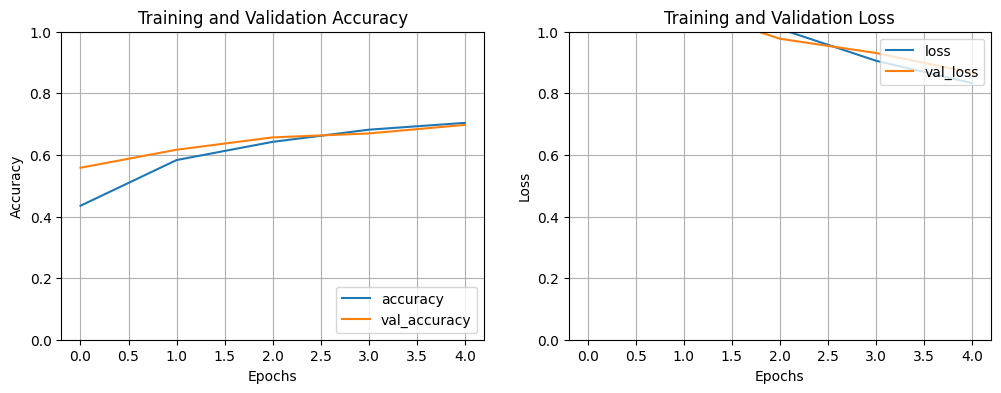

In [11]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0,1])
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid()

plt.show()